Due: 09/17

# Task 1
Design a quantum circuit that takes as input a vector of integers and returns a quantum state which is a superposition of indices of the target solution, obtaining in the output the indices of the inputs where two adjacent bits will always have different values.

### Ex 1
Input: [1,5,7,10]
- 1 = 0001
- 5 = 0101
- 7 = 0111
- 10 = 1010
Output: (1/sqrt(2))*(|01> + |11>)

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer import QasmSimulator

from utils import *

In [5]:
EX_INPUT = [1,5,4,2]

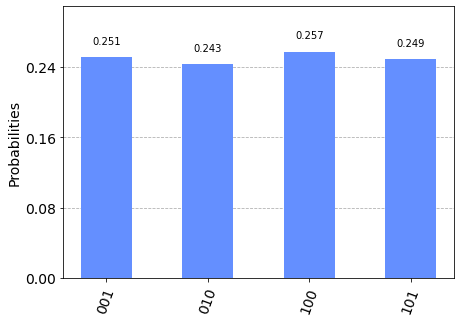

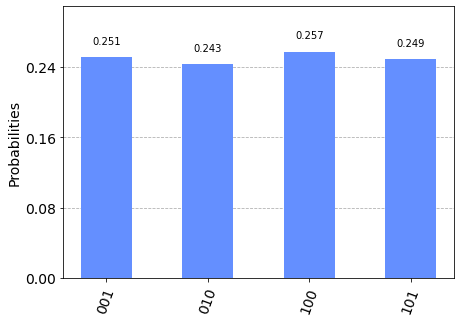

In [7]:
alpha_size = 2

tau_size = 2**alpha_size

mem_block_size = 3
mem_blocks = tau_size
mem_size = mem_block_size * mem_blocks

output_size = mem_block_size

# qc = QuantumCircuit(output_start + output_size)
alpha = QuantumRegister(alpha_size, 'a')
tau = QuantumRegister(tau_size, 'tau')
mem = QuantumRegister(mem_size, 'mem')
output = QuantumRegister(output_size, 'out')
classic = ClassicalRegister(output_size, "clsc")
qc = QuantumCircuit(alpha, tau, mem, output, classic)

#writing in the memory
qc.append(set_mem(EX_INPUT, mem, mem_block_size), spread([mem]))
qc.barrier()

#input alpha
qc.h(alpha[0])
qc.h(alpha[1])
# qc.x(alpha[0])
# qc.x(alpha[1])

#fan out
qc.append(one_hot_fan(alpha, tau), spread([alpha,tau]))

#read mem
qc.append(controlled_read(tau,mem,mem_block_size, output), spread([tau,mem,output]))
# controlled_read(tau,mem,mem_block_size,output, qc=qc)

qc.measure(output, classic)
# qc.draw()
counts = simulate(qc)
plot_histogram(counts)